In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
data = pd.read_csv(r"C:\Users\charan\Downloads\Final Year Project\Datasets\combined.csv")
data.head()

,Unnamed: 0,Recipe,ingredients
0,0,No-Bake Nut Cookies,"brown sugar, milk, vanilla, nuts, butter, bite..."
1,1,Jewell Ball'S Chicken,"beef, chicken breasts, cream of mushroom soup,..."
2,2,Creamy Corn,"frozen corn, cream cheese, butter, garlic powd..."
3,3,Chicken Funny,"chicken, chicken gravy, cream of mushroom soup..."
4,4,Reeses Cups(Candy),"peanut butter, graham cracker crumbs, butter, ..."


In [6]:
data.tail()

,Unnamed: 0,Recipe,ingredients
12188,12188,Til Pitha,"Glutinous rice, black sesame seeds, gur"
12189,12189,Bebinca,"Coconut milk, egg yolks, clarified butter, all..."
12190,12190,Shufta,"Cottage cheese, dry dates, dried rose petals, ..."
12191,12191,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all..."
12192,12192,Pinaca,"Brown rice, fennel seeds, grated coconut, blac..."


In [7]:
data.shape

(12193, 3)

In [8]:
data.rename(columns = {'Unnamed: 0':'index'}, inplace = True) 
print(data.head(2))

   index                 Recipe  \
0      0    No-Bake Nut Cookies   
1      1  Jewell Ball'S Chicken   

                                         ingredients  
0  brown sugar, milk, vanilla, nuts, butter, bite...  
1  beef, chicken breasts, cream of mushroom soup,...  


In [9]:
len(data["Recipe"].unique())

10799

In [10]:
len(data["ingredients"].unique())

12167

In [11]:
data["ingredients"].value_counts()

flour, baking powder, salt, shortening, milk                                                                    3
flour, mayonnaise, buttermilk                                                                                   2
Chhena, sugar, ghee                                                                                             2
flour, sugar, butter, eggs, brown sugar, vanilla, baking soda, walnuts, raisins, flaked coconut                 2
wheat flour,ghee,jaggery,water,cardamom powder (elaichi)                                                        2
                                                                                                               ..
sauerkraut, caraway seed, brown sugar, onion, margarine, apples, margarine, brown sugar, frankfurters           1
celery, butter, cream cheese, tomato paste, salt                                                                1
chicken, cream of chicken soup, milk, green chilies, onion, corn tortillas, Longhorn che

In [12]:
data["Recipe"].value_counts()

Chicken Casserole                     40
Broccoli Casserole                    23
Pecan Pie                             20
Cheese Ball                           16
Pumpkin Bread                         16
                                      ..
Homemade Oreo Cookies                  1
Golden Brown Squash Casserole          1
Banana Bars                            1
Hot Cranberry Apple Orange Compote     1
Pinaca                                 1
Name: Recipe, Length: 10799, dtype: int64

In [13]:
data.isnull().sum()

index          0
Recipe         0
ingredients    2
dtype: int64

In [14]:
data = data.dropna()

In [15]:
data.isnull().sum()

index          0
Recipe         0
ingredients    0
dtype: int64

In [16]:
data.describe()

,index
count,12191.000000
mean,6096.672381
std,3519.850427
min,0.000000
25%,3049.500000
50%,6097.000000
75%,9144.500000
max,12192.000000


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12191 entries, 0 to 12192
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        12191 non-null  int64 
 1   Recipe       12191 non-null  object
 2   ingredients  12191 non-null  object
dtypes: int64(1), object(2)
memory usage: 381.0+ KB


**Top 20 Recipes**

In [18]:
Top_20_Recipes = data["Recipe"].value_counts().index.tolist()[:20]
Top_20_Recipes

['Chicken Casserole',
 'Broccoli Casserole',
 'Pecan Pie',
 'Cheese Ball',
 'Pumpkin Bread',
 'Banana Bread',
 'Banana Nut Bread',
 'Corn Casserole',
 'Carrot Cake',
 'Chicken Pot Pie',
 'Potato Casserole',
 'Peach Cobbler',
 'Cranberry Salad',
 'Potato Salad',
 'Sweet Potato Casserole',
 'Strawberry Pie',
 'Earthquake Cake',
 'Squash Casserole',
 'Peanut Butter Pie',
 'Sausage Balls']

In [19]:
#Frequency of Top-20 Recipes
Top_20_Recipes_Freq = data["Recipe"].value_counts().values.tolist()[:20]
print(Top_20_Recipes_Freq)

[40, 23, 20, 16, 16, 15, 15, 13, 12, 12, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10]


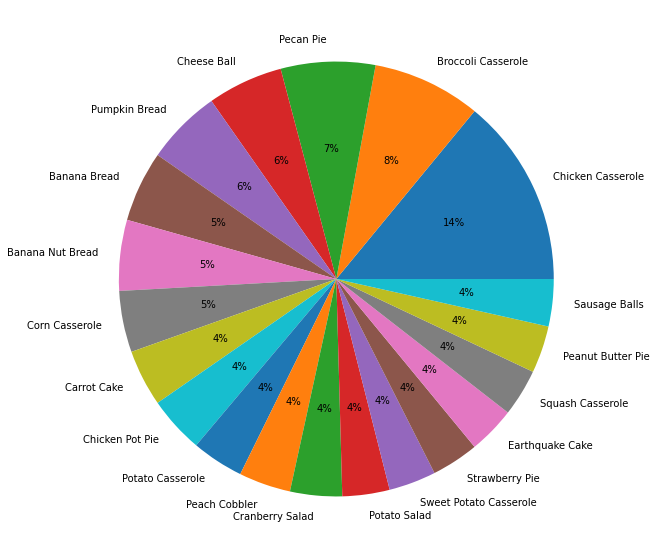

In [20]:
fig = plt.figure(figsize =(10, 10))
plt.pie(Top_20_Recipes_Freq, labels=Top_20_Recipes, autopct='%.0f%%') 

plt.show() 

**Top-10 Most Repeated Recipe and Ingredients combinations**

In [21]:
Combinations = data.groupby(['Recipe','ingredients']).size().sort_values(ascending=False)
print(Combinations[:10])

Recipe                             ingredients                                                                                                           
Cheese Ball                        cream cheese, pineapple, onion, green pepper, pecans                                                                      2
Kentucky Pecan Pie                 white corn syrup, brown sugar, salt, butter, vanilla, eggs, pecans                                                        2
Orange Julius                      orange juice, water, milk, sugar, vanilla, cubes                                                                          2
  Bengali Style Cholar Dal Recipe  turmeric powder,salt,ginger,ghee,coconut,cinnamon,sugar,chana dal,dry red chillies,bay leaf,green chillies,cumin seeds    1
Orange Jello Salad                 O, water, sugar, pineapple, nuts, grated cheese                                                                           1
Orange Bran Streusel Cake          butter, cereal, 

**Applying TF-IDF Vectorizer**

In [22]:
combined_features = data["Recipe"]+" "+data["ingredients"]
print(combined_features)

0        No-Bake Nut Cookies brown sugar, milk, vanilla...
1        Jewell Ball'S Chicken beef, chicken breasts, c...
2        Creamy Corn frozen corn, cream cheese, butter,...
3        Chicken Funny chicken, chicken gravy, cream of...
4        Reeses Cups(Candy)   peanut butter, graham cra...
                               ...                        
12188    Til Pitha Glutinous rice, black sesame seeds, gur
12189    Bebinca Coconut milk, egg yolks, clarified but...
12190    Shufta Cottage cheese, dry dates, dried rose p...
12191    Mawa Bati Milk powder, dry fruits, arrowroot p...
12192    Pinaca Brown rice, fennel seeds, grated coconu...
Length: 12191, dtype: object


In [23]:
# converting the text data to feature vectors

vectorizer = TfidfVectorizer()

In [24]:
feature_vectors = vectorizer.fit_transform(combined_features)
print(feature_vectors)

  (0, 664)	0.30639168149415813
  (0, 5266)	0.16991908508420894
  (0, 5730)	0.3088924517282461
  (0, 5788)	0.39469315580260184
  (0, 670)	0.40613051742158285
  (0, 903)	0.13712363529927013
  (0, 4358)	0.18740413339400203
  (0, 6693)	0.16063797668752403
  (0, 3994)	0.13568470881821024
  (0, 6097)	0.107427133329134
  (0, 831)	0.1835971298571528
  (0, 1467)	0.23946437064015913
  (0, 4353)	0.30342810339828646
  (0, 396)	0.29644009412099476
  (0, 4319)	0.28361468111221017
  (1, 5913)	0.2291351014372209
  (1, 5909)	0.20691933874335086
  (1, 4192)	0.24525957082467956
  (1, 4378)	0.23294622343947394
  (1, 1536)	0.3359505337427733
  (1, 806)	0.2615574039554667
  (1, 521)	0.23202534777195552
  (1, 1215)	0.38091530409957236
  (1, 413)	0.35594918550953436
  (1, 2941)	0.5323140071336698
  :	:
  (12188, 4837)	0.3495864261835427
  (12188, 1880)	0.20487002534093374
  (12188, 1892)	0.15541670637763724
  (12188, 1166)	0.14137205733668357
  (12189, 493)	0.49130233015343683
  (12189, 3896)	0.36197783728344

In [25]:
# getting the similarity scores using cosine similarity

similarity = cosine_similarity(feature_vectors)

In [26]:
print(similarity)

[[1.         0.         0.02943041 ... 0.         0.01955936 0.08376915]
 [0.         1.         0.08262778 ... 0.         0.         0.        ]
 [0.02943041 0.08262778 1.         ... 0.03170233 0.03127471 0.05579689]
 ...
 [0.         0.         0.03170233 ... 1.         0.02600643 0.        ]
 [0.01955936 0.         0.03127471 ... 0.02600643 1.         0.02674653]
 [0.08376915 0.         0.05579689 ... 0.         0.02674653 1.        ]]


In [27]:
print(similarity.shape)


(12191, 12191)


In [29]:
# getting the Recipe name from the user

Recipe_name = input(' Enter your favourite Recipe : ')

 Enter your favourite Recipe : Taco Pie


In [30]:
list_of_all_recipes = data["Recipe"].tolist()
print(list_of_all_recipes)

['No-Bake Nut Cookies', "Jewell Ball'S Chicken", 'Creamy Corn', 'Chicken Funny', 'Reeses Cups(Candy)  ', 'Cheeseburger Potato Soup', 'Rhubarb Coffee Cake', 'Scalloped Corn', "Nolan'S Pepper Steak", 'Millionaire Pie', 'Double Cherry Delight', 'Buckeye Candy', 'Quick Barbecue Wings', 'Taco Salad Chip Dip', 'Pink Stuff(Frozen Dessert)  ', 'Fresh Strawberry Pie', 'Easy German Chocolate Cake', 'Broccoli Salad', 'Strawberry Whatever', 'Eggless Milkless Applesauce Cake', "Grandma Hanrath'S Banana Breadfort Collins, Colorado  ", 'Chocolate Frango Mints', 'Cuddy Farms Marinated Turkey', 'Spaghetti Sauce To Can', 'Prize-Winning Meat Loaf', 'Smothered Round Steak(Servings: 4)  ', 'Corral Barbecued Beef Steak Strips', 'Easy Fudge', 'Taco-Filled Green Pepper', 'One Hour Rolls', 'Punch Bowl Fruit Salad', 'Summer Chicken', 'Cherry Pizza', 'Potato And Cheese Pie', 'Tuna Macaroni Casserole', 'Artichoke Dip', 'Broccoli Dip For Crackers', 'Summer Spaghetti', 'Pear-Lime Salad', 'Watermelon Rind Pickles', 

In [31]:
# finding the close match for the movie name given by the user

find_close_match = difflib.get_close_matches(Recipe_name, list_of_all_recipes)
print(find_close_match)

['Taco Pie', 'Taco Pizza', 'Taco Pizza']


In [32]:
close_match = find_close_match[0]
print(close_match)

Taco Pie


In [33]:
# finding the index of the recipe 

index_of_the_recipe = data[data.Recipe == close_match]['index'].values[0]
print(index_of_the_recipe)

4455


In [35]:
# getting a list of similar Recipes

similarity_score = list(enumerate(similarity[index_of_the_recipe]))
print(similarity_score)

[(0, 0.052556677184487574), (1, 0.09609438788722652), (2, 0.0789333124143295), (3, 0.04779295648131638), (4, 0.0), (5, 0.061722493700862704), (6, 0.005025973778806503), (7, 0.049429918334337186), (8, 0.019060964102498516), (9, 0.06552329092431718), (10, 0.013101533627643701), (11, 0.0), (12, 0.0), (13, 0.07602336407524304), (14, 0.06733498053049222), (15, 0.02108966858162563), (16, 0.0), (17, 0.0), (18, 0.060400742135947025), (19, 0.0), (20, 0.004588773721388691), (21, 0.0453950627986268), (22, 0.0), (23, 0.00584282678307723), (24, 0.01713998343751866), (25, 0.03252840115534902), (26, 0.023655807925508414), (27, 0.06954791207340076), (28, 0.05245469632953351), (29, 0.007334715416589184), (30, 0.0), (31, 0.007482600461294347), (32, 0.0), (33, 0.00867629382558269), (34, 0.010766038240482457), (35, 0.0), (36, 0.05192978087178645), (37, 0.1698973937106127), (38, 0.03931301290643664), (39, 0.0), (40, 0.0054951537033794545), (41, 0.006586304671016201), (42, 0.01973592828080129), (43, 0.0), (

In [36]:
len(similarity_score)

12191

In [37]:
# sorting the recipes based on their similarity score

sorted_similar_recipes = sorted(similarity_score, key = lambda x:x[1], reverse = True)
print(sorted_similar_recipes)

[(4455, 1.0), (165, 0.6450493889807277), (3284, 0.6275131730097998), (5205, 0.5632272321142322), (2105, 0.5109383723565603), (11129, 0.4463392403094462), (3301, 0.4067445001181053), (3852, 0.3779519895581437), (12039, 0.36386912213320777), (2154, 0.3590116525235528), (2129, 0.35388401820501636), (3959, 0.34806064831475375), (10309, 0.3430742839562345), (6964, 0.33974166050543464), (5049, 0.3339720665091861), (10820, 0.31776424831839123), (4112, 0.3085290959187413), (4192, 0.29986313623497857), (4819, 0.2857109020628121), (9986, 0.285531078957457), (10011, 0.27429807513945803), (3701, 0.27191390786521946), (1698, 0.2623562659403005), (3368, 0.2491098638249134), (8391, 0.24650823099638752), (408, 0.24625732032637224), (1843, 0.2458242845179784), (5725, 0.24377508060370073), (2023, 0.23595421996920013), (2459, 0.23483230672154876), (3708, 0.23422299801727464), (4126, 0.2330038602854357), (4120, 0.23042927693183776), (3070, 0.2302514591109689), (4758, 0.22998699682312562), (4155, 0.2291601

In [38]:
# print the name of similar movies based on the index

print('Recipes suggested for you : \n')

i = 1

for recipe in sorted_similar_recipes:
  index = recipe[0]
  title_from_index = data[data.index==index]['Recipe'].values[0]
  if (i<11):
    print(i, '.',title_from_index)
    i+=1

Recipes suggested for you : 

1 . Taco Pie
2 . Chicken Breasts With Wild Rice
3 . No Fools Pie
4 . Fluffy Banana Cake
5 . Cheese Straws
6 . Tofu Methi Paratha Recipe
7 . Cranberry Squares
8 . Arizona Baked Frijoles
9 . Misi roti
10 . Granny'S Fruit Cake


IndexError: index 0 is out of bounds for axis 0 with size 0

In [39]:
Recipe_name = input(' Enter your favourite Recipe : ')
list_of_all_recipes = data["Recipe"].tolist()
find_close_match = difflib.get_close_matches(Recipe_name, list_of_all_recipes)
close_match = find_close_match[0]
index_of_the_recipe = data[data.Recipe == close_match]['index'].values[0]
similarity_score = list(enumerate(similarity[index_of_the_recipe]))
sorted_similar_recipes = sorted(similarity_score, key = lambda x:x[1], reverse = True)
print('Recipes suggested for you : \n')

i = 1

for recipe in sorted_similar_recipes:
  index = recipe[0]
  title_from_index = data[data.index==index]['Recipe'].values[0]
  if (i<11):
    print(i, '.',title_from_index)
    i+=1

 Enter your favourite Recipe : Masala Karela Recipe
Recipes suggested for you : 

1 . Masala Karela Recipe
2 . Sweet And Sour Vegetables With Paneer Curry Recipe
3 . Chingiri Paturi Recipe
4 . Barnyard Millet Sweet Pongal Recipe (Kuthiraivali Sakkarai Pongal)
5 . Eggless Whole Wheat Cake with Chocolate Buttercream Frosting Recipe
6 . Anda Bhurji Recipe
7 . French Crullers Recipe
8 . Goan Style French Beans Foogath Recipe
9 . Chickpea Salad with Cherry Tomatoes,Olives and Capsicum Recipe
10 . Pasi Paruppu Kosumalli Recipe (Spiced Lentil Salad Recipe)


IndexError: index 0 is out of bounds for axis 0 with size 0

In [40]:
Recipe_name = input(' Enter your favourite Recipe : ')
list_of_all_recipes = data["Recipe"].tolist()
find_close_match = difflib.get_close_matches(Recipe_name, list_of_all_recipes)
close_match = find_close_match[0]
index_of_the_recipe = data[data.Recipe == close_match]['index'].values[0]
similarity_score = list(enumerate(similarity[index_of_the_recipe]))
sorted_similar_recipes = sorted(similarity_score, key = lambda x:x[1], reverse = True)
print('Recipes suggested for you : \n')

i = 1

for recipe in sorted_similar_recipes:
  index = recipe[0]
  title_from_index = data[data.index==index]['Recipe'].values[0]
  if (i<11):
    print(i, '.',title_from_index)
    i+=1

 Enter your favourite Recipe : Andhra Steel Ingavu Charu Recipe - Asfoitida Flavored Tamarand Rasam
Recipes suggested for you : 

1 . Andhra Steel Ingavu Charu Recipe - Asfoitida Flavored Tamarand Rasam
2 . Goan Style Mushroom Vindaloo Recipe
3 . Sweet & Spicy Ripe Mango Curry Recipe
4 . Orange Lemon Tea Cake Recipe
5 . Prawns Spinach Spaghetti Recipe
6 . Homemade Pan Pizza With Perfectly Crispy Crust Recipe
7 . Surti Obbattu Recipe - Fruit & Nut Pooris In Saffron Milk
8 . Seppankizhangu Roast (South Indian Style Arbi Fry) Recipe
9 . Zhejiang  Style Crispy Five Spice Powder Spring Roll Recipe
10 . Bandhakopir Ghonto Recipe (Bengali Style Cabbage Fry)


IndexError: index 0 is out of bounds for axis 0 with size 0